In [1]:
# Instalar las dependencias antes de instalaredaSQL
!pip install pyodbc
!pip install ipython

In [2]:
#Instalamos edaSQL
!pip install edaSQL

In [1]:
import edaSQL
import pandas as pd

In [2]:
# Crear una instancia de edaSQL con la opcion de imprimir toda la salida
edasql = edaSQL.SQL(printAll=True)

#Conectar a la base de datos

edasql.connectToDataBase(
    server='10.211.55.4', # Remplaza el nombre de tu servidor SQL
    database= 'edaSQL', # Reeplaza con el nombre de la base de datos
    user='jairojaenz', # Reemplaza con tu usuario SQL
    password='jairo1234', # Remplaza con tu contraseña SQL
    sqlDriver= 'ODBC Driver 17 for SQL Server' 
)

========== Connected to DataBase Successfully ===========
Server:  10.211.55.4
DataBase:  edaSQL
User :  jairojaenz
Password :  jairo1234


## Consultar datos

In [3]:
data = pd.read_sql('SELECT * FROM INX', edasql.dbConnection)

In [4]:
display(data.head())

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,Location,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,India,10,2,2,10,7,0,8,0,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,India,20,2,3,7,7,1,7,0,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,India,20,2,3,18,13,1,12,0,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,India,23,2,2,21,6,12,6,0,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,India,10,1,3,2,2,2,2,0,3


In [5]:
# vision general de los datos
insights = edaSQL.EDA(data, HTMLDisplay=True)
dataInsights = insights.dataInsights()

Number of Columns :,30
Number of Rows :,1200
Overall Missing cells :,617
Overall Missing cells (%) :,1.74
Duplicate rows :,0
Duplicate rows (%) :,0.0
Numeric :,4
Categorical :,26
Date and Time :,0


In [6]:
data.describe()

,Age,EmpHourlyRate,EmpLastSalaryHikePercent,PerformanceRating
count,1200.000000,1200.000000,1187.000000,1200.000000
mean,36.918333,65.981667,15.224094,2.948333
std,9.087289,20.211302,3.625652,0.518866
min,18.000000,30.000000,11.000000,2.000000
25%,30.000000,48.000000,12.000000,3.000000
50%,36.000000,66.000000,14.000000,3.000000
75%,43.000000,83.000000,18.000000,3.000000
max,60.000000,100.000000,25.000000,4.000000


In [7]:
deepInsights = insights.deepInsights()

## 4. correlación

In [8]:
eda = edaSQL.EDA(dataFrame=data)

## 4.1 Correlación Pearson

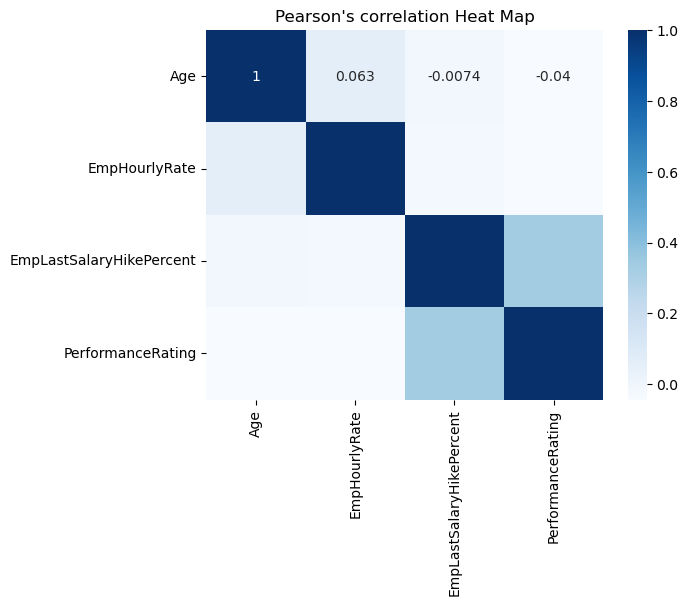

In [9]:
eda.pearsonCorrelation()

## 4.2 Correlación Spearman

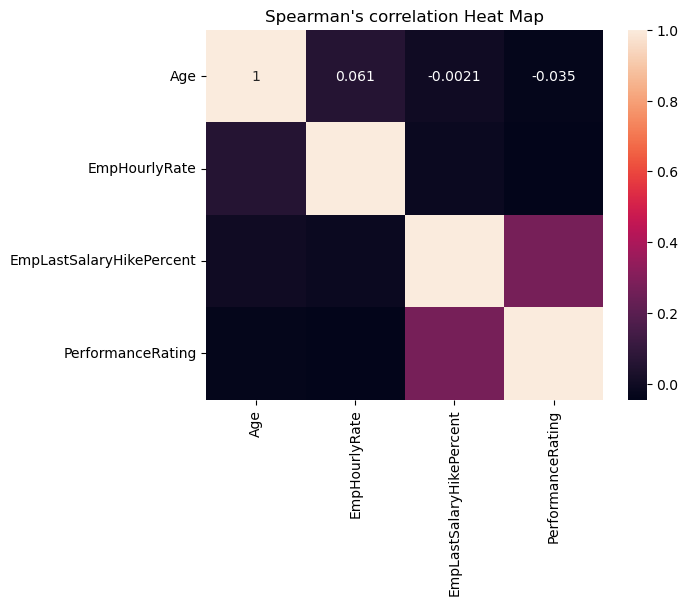

In [10]:
eda.spearmanCorrelation()

## 5. Valores faltantes

## 5.1 matrix plot

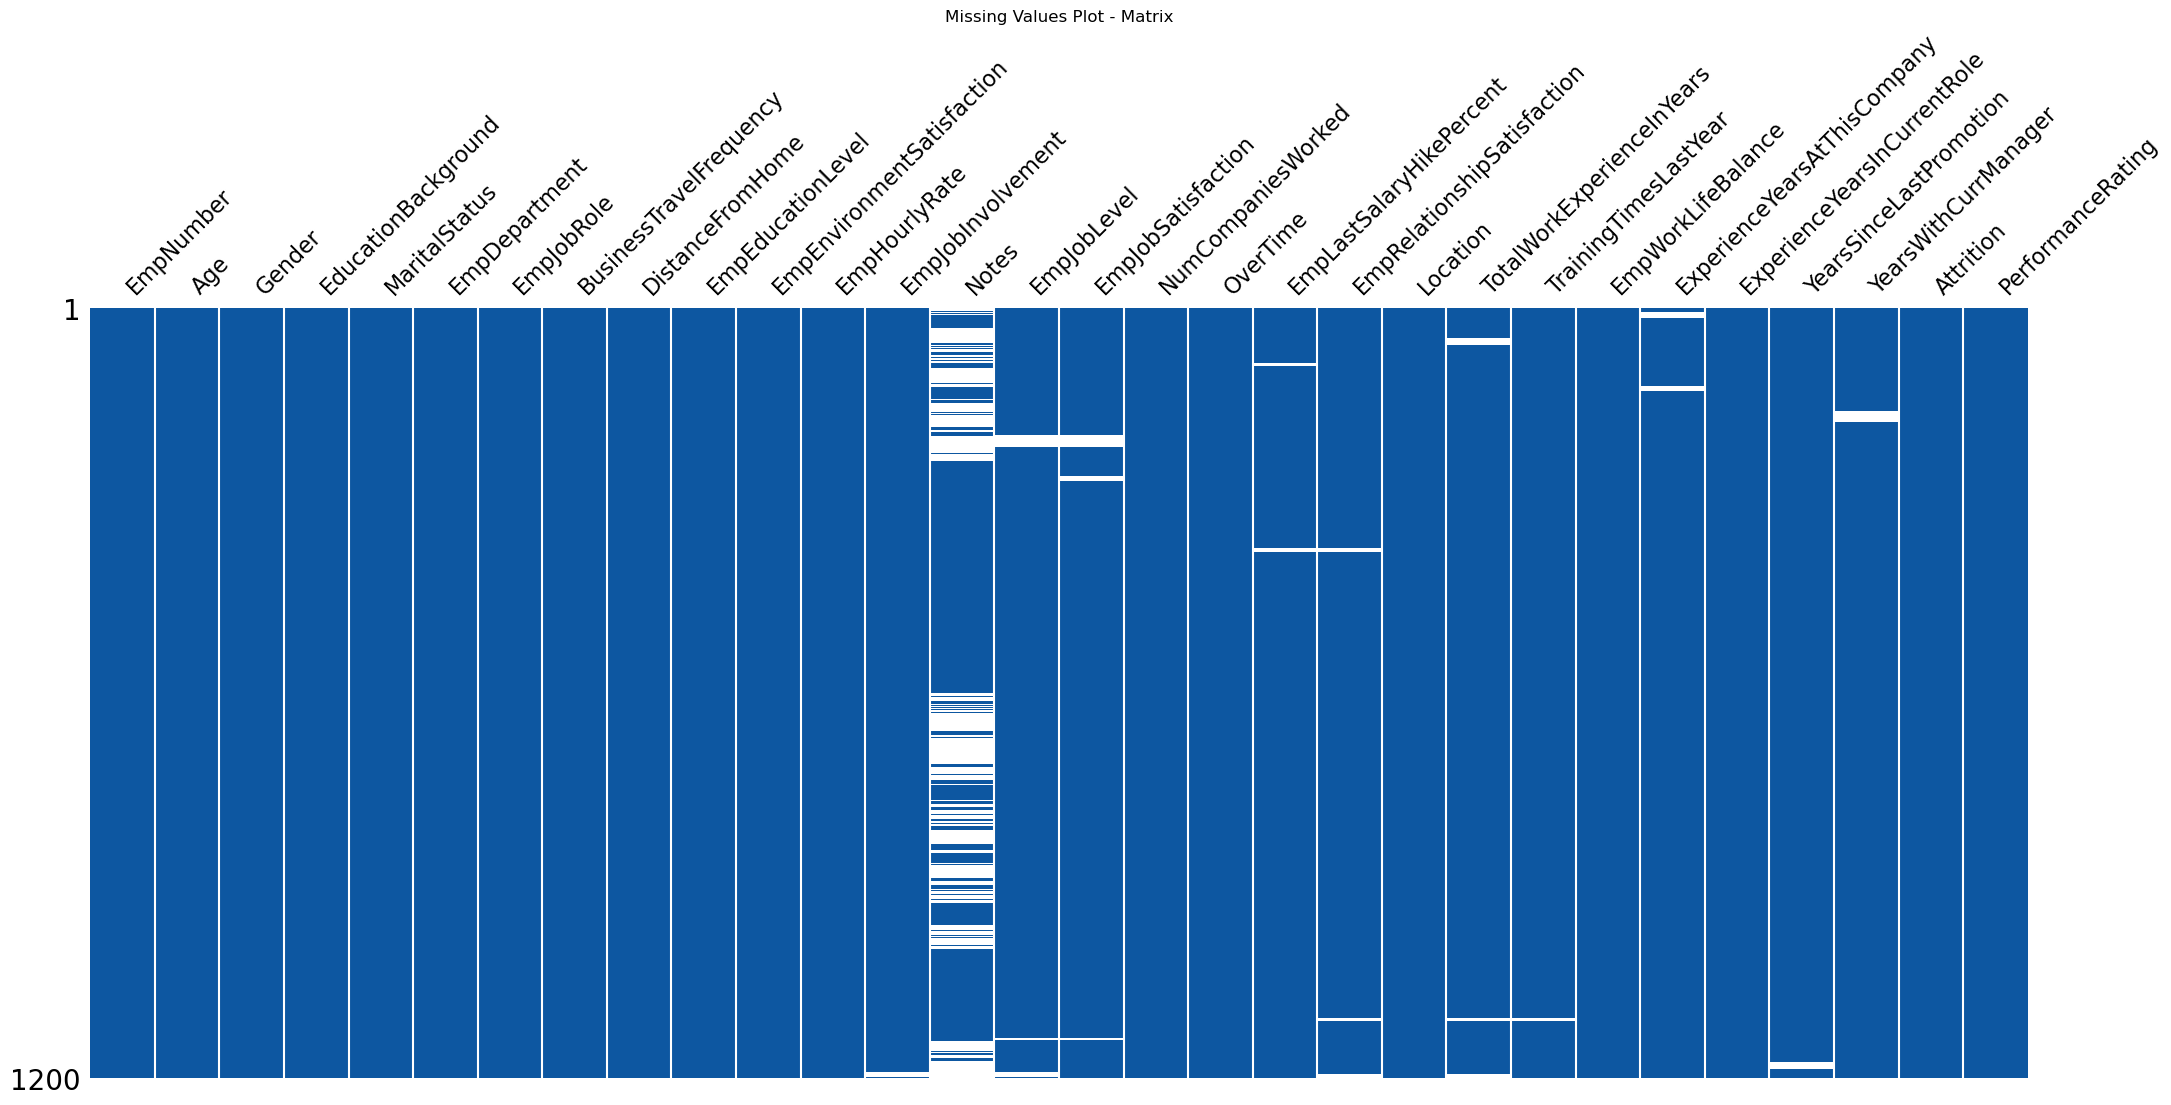

In [11]:
eda.missingValuesPlot(plot='matrix')

## 5.2 Count Bar Plot

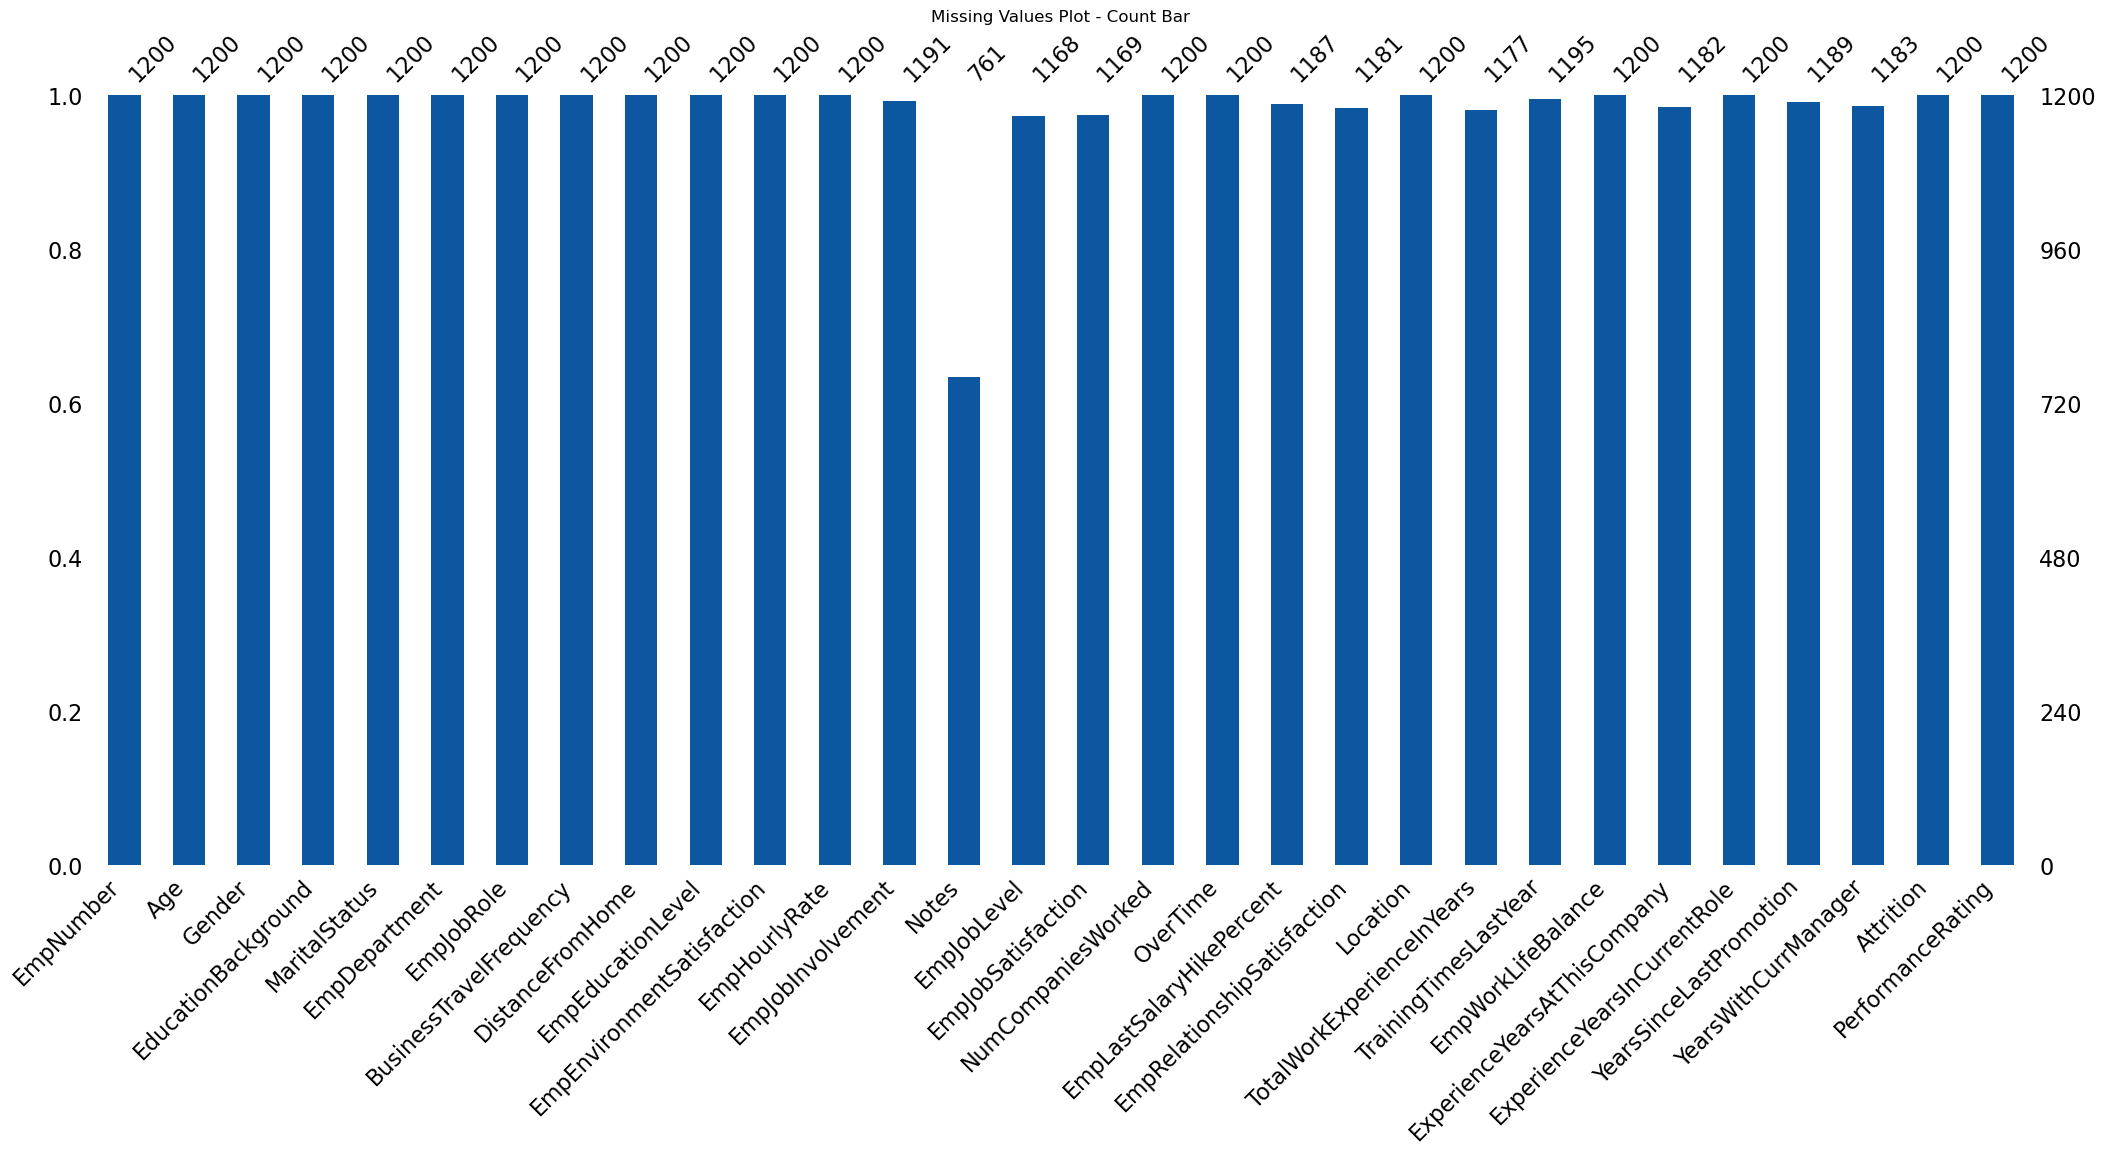

In [12]:
eda.missingValuesPlot(plot='bar')

## 5.3 Heatmap Plot

ValueError: could not convert string to float: '--'

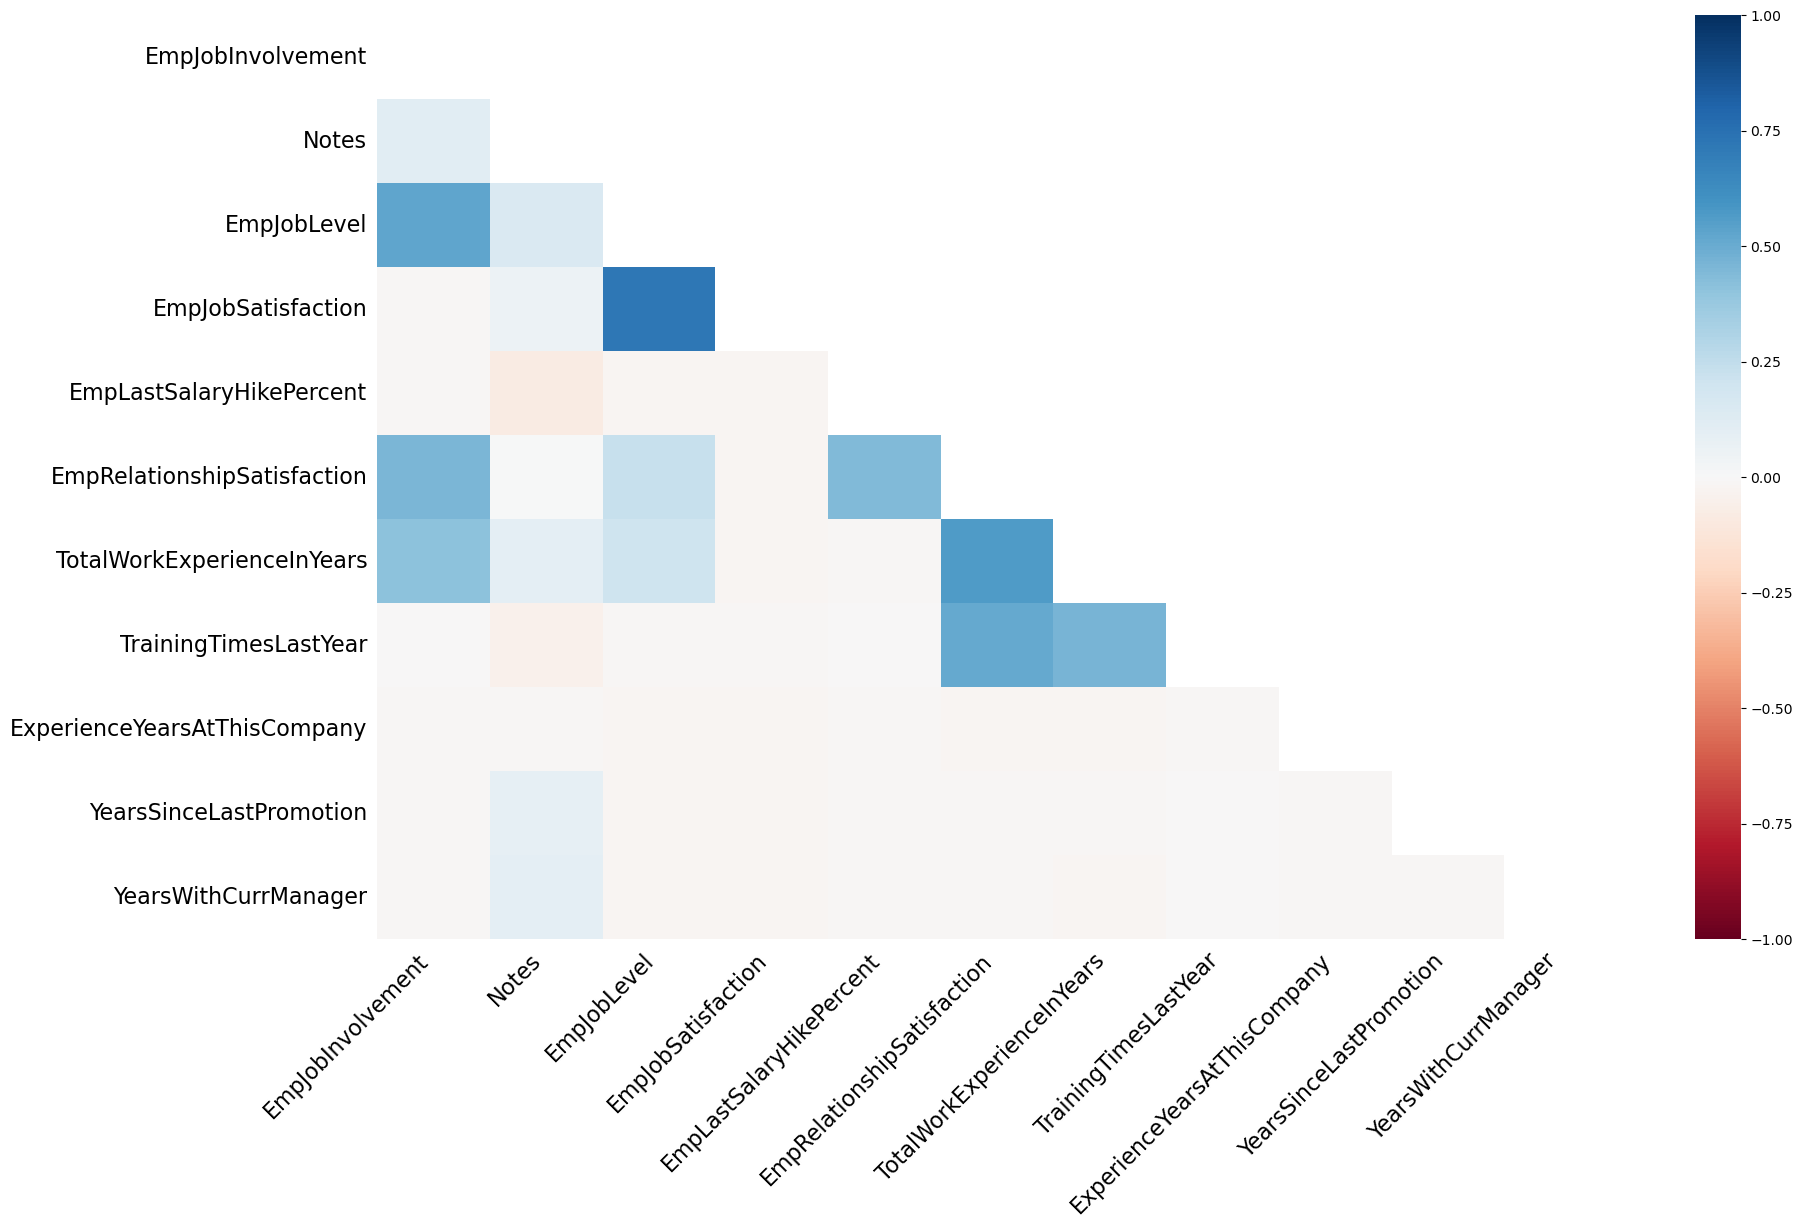

In [16]:
eda.missingValuesPlot(plot='heatmap')

## 5.4 Dendrogan Plot

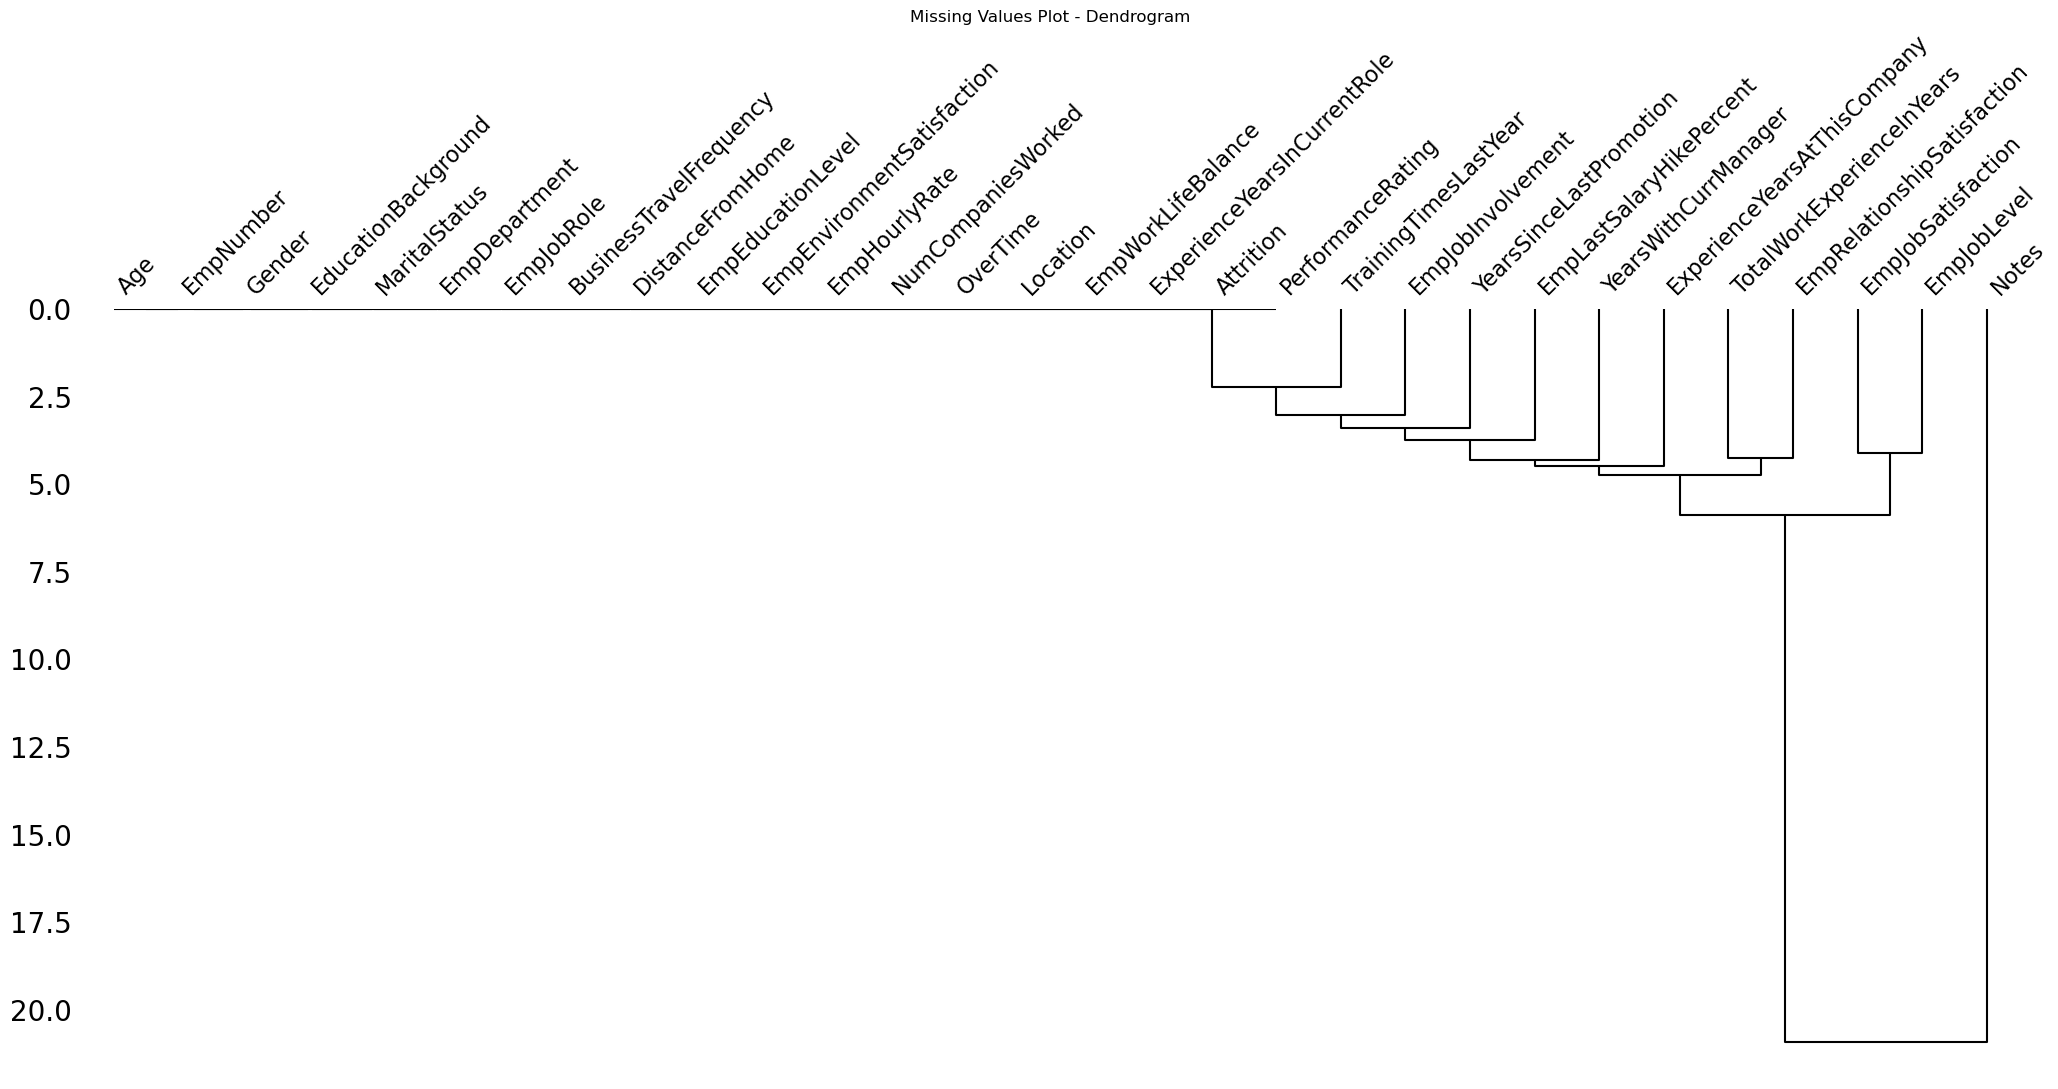

In [17]:
eda.missingValuesPlot(plot='dendrogram')

## 6. Outliers
## 6.1 Vizialización
## 6.1.1 Box Plot

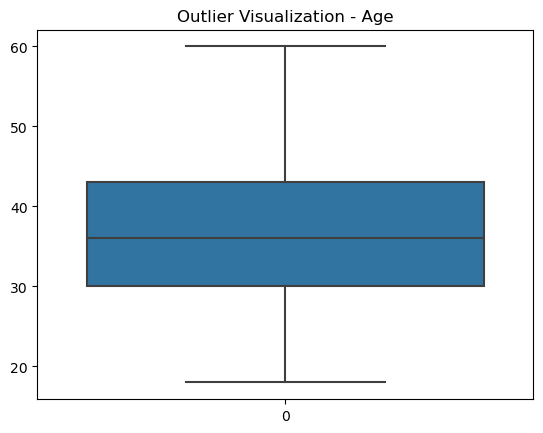

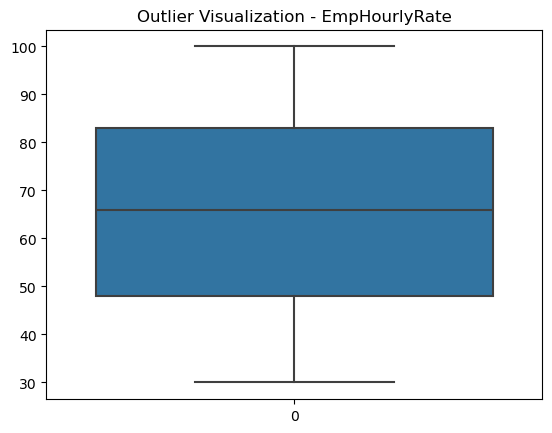

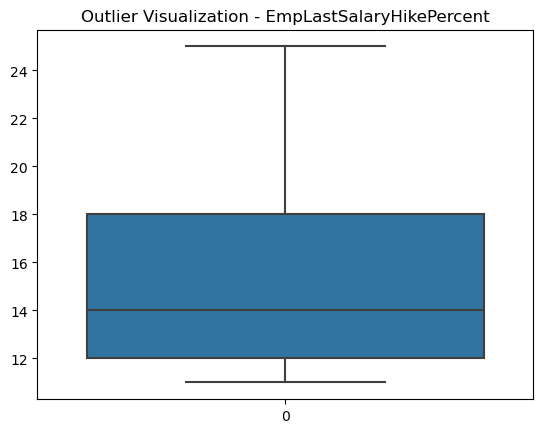

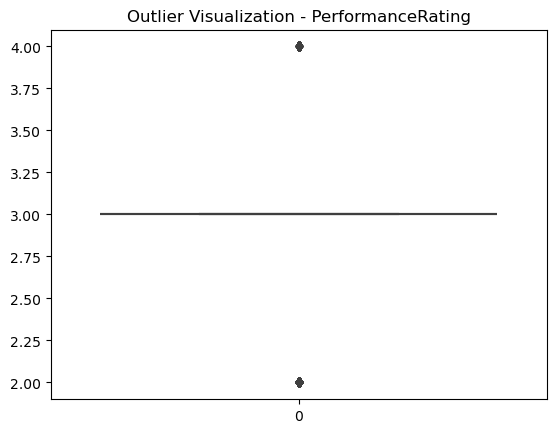

In [18]:
eda.outliersVisualization(plot='box')

## 6.1.2 Scatter Plot

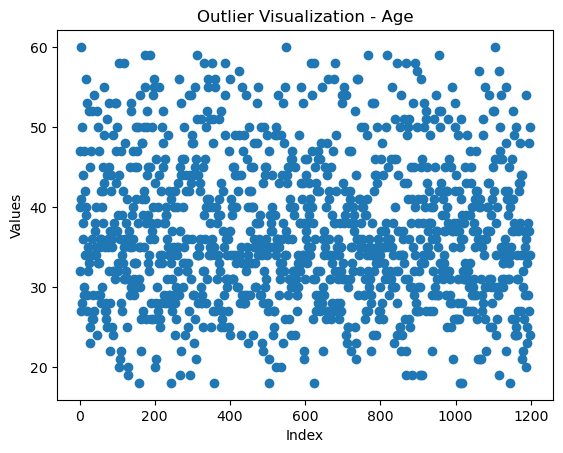

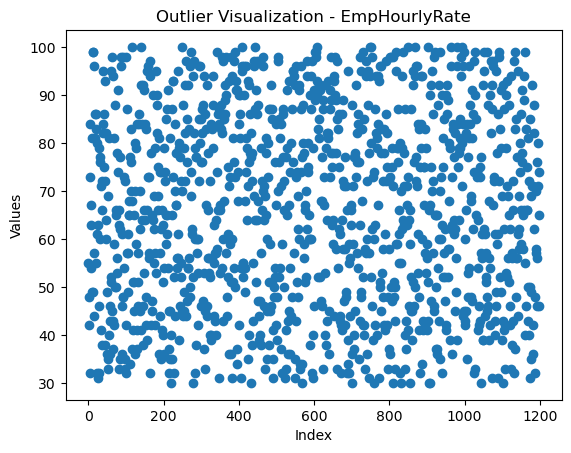

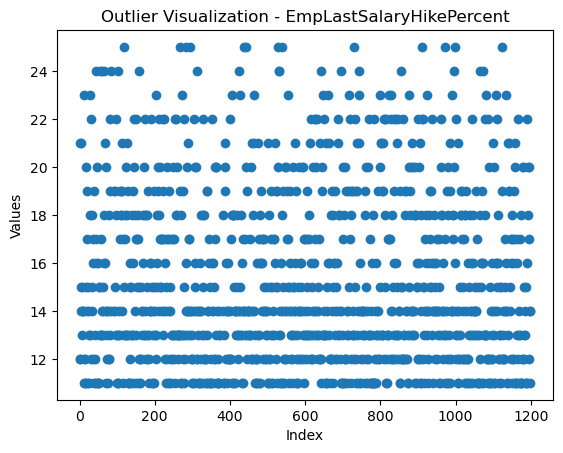

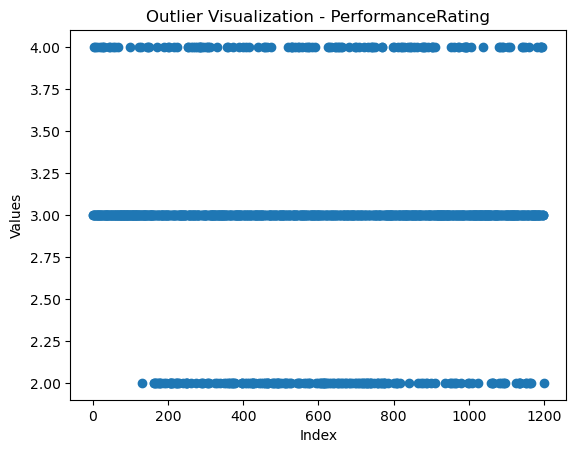

In [19]:
eda.outliersVisualization(plot='scatter')

<h1>Métodos para conectarse por autenticación de windows</h1>

In [20]:
# Metodo 1 con autenticación de windows
import pyodbc
# Configuración de la conexión
server = '10.211.55.4'
database = 'edaSQL'
driver = 'ODBC Driver 17 for SQL Server'
# Intenta la conexión utilizando autenticación de Windows
try:
    conn = pyodbc.connect(
        f'DRIVER={{{driver}}};'
        f'SERVER={server};'
        f'DATABASE={database};'
        'Trusted_Connection=yes;'
    )
    print("Conexión exitosa a la base de datos usando autenticación de Windows")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")


Error al conectar a la base de datos: ('HY000', '[HY000] [Microsoft][ODBC Driver 17 for SQL Server]SSPI Provider:  The operation or option is not available (1048576) (SQLDriverConnect)')


In [21]:
# Metodo 2 con autenticación de windows
import pyodbc
import pandas as pd

class edaSQL:
    def __init__(self, printAll=False):
        self.printAll = printAll
        self.dbConnection = None

    def connectToDataBase(self, server, database, sqlDriver):
        try:
            # Configuración de la conexión
            self.dbConnection = pyodbc.connect(
                f'DRIVER={{{sqlDriver}}};'
                f'SERVER={server};'
                f'DATABASE={database};'
                'Trusted_Connection=yes;'
            )
            if self.printAll:
                print("Conexión exitosa a la base de datos usando autenticación de Windows")
        except Exception as e:
            print(f"Error al conectar a la base de datos: {e}")

# Crear una instancia de edaSQL
edasql = edaSQL(printAll=True)

# Conectar a la base de datos usando autenticación de Windows
edasql.connectToDataBase(
    server='10.211.55.4',
    database='edaSQL',
    sqlDriver='ODBC Driver 17 for SQL Server'
)

Error al conectar a la base de datos: ('HY000', '[HY000] [Microsoft][ODBC Driver 17 for SQL Server]SSPI Provider:  The operation or option is not available (1048576) (SQLDriverConnect)')


In [22]:
# cerrar conexion
edasql.dbConnection.close()

AttributeError: 'NoneType' object has no attribute 'close'